<a href="https://colab.research.google.com/github/ameympatil/MIT-ML/blob/main/A1_Building_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amey Patil
### 1132210050

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from numpy import loadtxt
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Tetuan City power consumption (1).csv')
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data.shape

(52416, 8)

In [ ]:
X = data.iloc[:,:5]
y = data.iloc[:,5]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(41932, 5) (10484, 5) (41932,) (10484,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model 1 (activation = 'Linear')

In [ ]:
model=Sequential()
model.add(Dense(224,input_dim=5,activation='relu'))
model.add(Dense(448,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

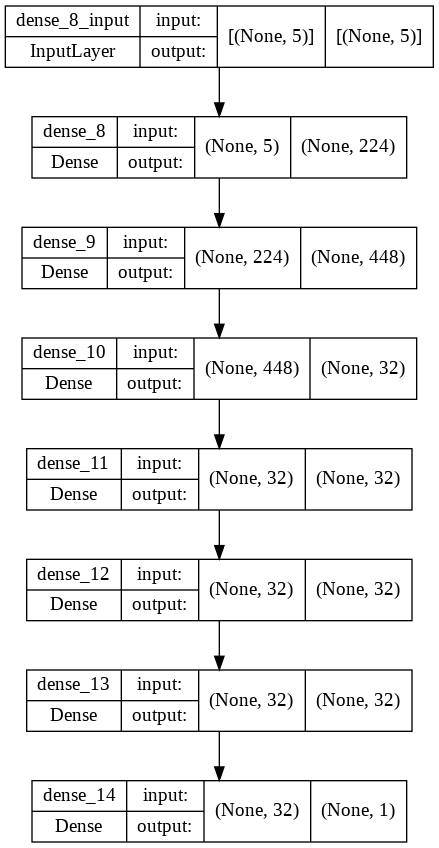

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
msle = MeanSquaredLogarithmicError()

In [ ]:
model.compile(loss='mae',optimizer='adam',metrics=['MeanAbsoluteError'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=20,verbose=1)

Epoch 1/20
2097/2097 [==============================] - 6s 3ms/step - loss: 6295.3369 - mean_absolute_error: 6295.3369
Epoch 2/20
2097/2097 [==============================] - 6s 3ms/step - loss: 4828.0571 - mean_absolute_error: 4828.0571
Epoch 3/20
2097/2097 [==============================] - 6s 3ms/step - loss: 4794.6157 - mean_absolute_error: 4794.6157
Epoch 4/20
2097/2097 [==============================] - 6s 3ms/step - loss: 4781.8081 - mean_absolute_error: 4781.8081
Epoch 5/20
2097/2097 [==============================] - 6s 3ms/step - loss: 4766.4224 - mean_absolute_error: 4766.4224
Epoch 6/20
2097/2097 [==============================] - 6s 3ms/step - loss: 4756.8584 - mean_absolute_error: 4756.8584
Epoch 7/20
2097/2097 [==============================] - 6s 3ms/step - loss: 4762.2554 - mean_absolute_error: 4762.2554
Epoch 8/20
2097/2097 [==============================] - 6s 3ms/step - loss: 4739.1211 - mean_absolute_error: 4739.1211
Epoch 9/20
2097/2097 [==========================

In [ ]:
pred = model.predict(X_test)
import numpy as np
from sklearn.metrics import r2_score
pred = np.squeeze(pred)
y_test = np.squeeze(np.array(y_test))
r2_score(y_test,pred)

0.2002066561909397

## Model 2 ('reLU')

In [ ]:
model=Sequential()
model.add(Dense(128,input_dim=7,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

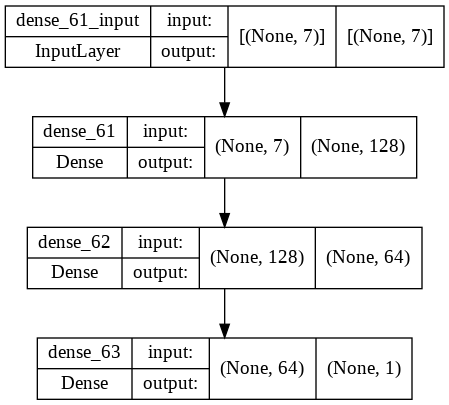

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
model.compile(loss='msle',optimizer='adam',metrics=['RootMeanSquaredError'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=20,verbose=1)

Epoch 1/20
2097/2097 [==============================] - 6s 3ms/step - loss: 13.2516 - root_mean_squared_error: 17709.7012
Epoch 2/20
2097/2097 [==============================] - 6s 3ms/step - loss: 1.0721 - root_mean_squared_error: 12312.5166
Epoch 3/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.1793 - root_mean_squared_error: 6879.0889
Epoch 4/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0793 - root_mean_squared_error: 4801.6445
Epoch 5/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0493 - root_mean_squared_error: 3931.8794
Epoch 6/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0388 - root_mean_squared_error: 3574.5908
Epoch 7/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0359 - root_mean_squared_error: 3437.8972
Epoch 8/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0342 - root_mean_squared_error: 3342.9443
Epoch 9/20
2097/2097 [===============

In [ ]:
pred = model.predict(X_test)
import numpy as np
from sklearn.metrics import r2_score
pred = np.squeeze(pred)
y_test = np.squeeze(np.array(y_test))
r2_score(y_test,pred)

0.8092637428280075

## Model 3 ('PreLU')

In [ ]:
model=Sequential()
model.add(Dense(128,input_dim=7,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='PReLU'))

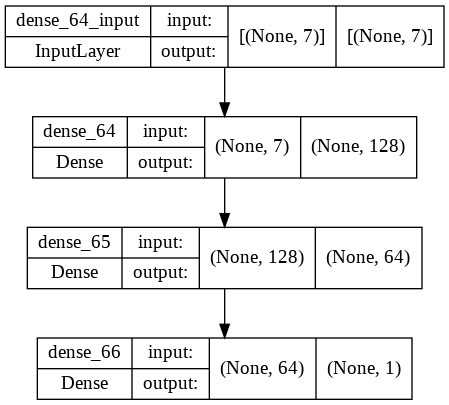

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
model.compile(loss='msle',optimizer='adam',metrics=['RootMeanSquaredError'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=20,verbose=1)

Epoch 1/20
2097/2097 [==============================] - 6s 3ms/step - loss: 12.6328 - root_mean_squared_error: 17602.0781
Epoch 2/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.8968 - root_mean_squared_error: 11658.1650
Epoch 3/20
2097/2097 [==============================] - 7s 3ms/step - loss: 0.1473 - root_mean_squared_error: 6332.3599
Epoch 4/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0725 - root_mean_squared_error: 4633.9204
Epoch 5/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0461 - root_mean_squared_error: 3835.8286
Epoch 6/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0380 - root_mean_squared_error: 3547.4292
Epoch 7/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0357 - root_mean_squared_error: 3425.9861
Epoch 8/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0339 - root_mean_squared_error: 3329.5144
Epoch 9/20
2097/2097 [===============

In [ ]:
pred = model.predict(X_test)
import numpy as np
from sklearn.metrics import r2_score
pred = np.squeeze(pred)
y_test = np.squeeze(np.array(y_test))
r2_score(y_test,pred)

0.8062491415481072

## Model 4 ('Elu')

In [ ]:
model=Sequential()
model.add(Dense(128,input_dim=7,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='ELU'))

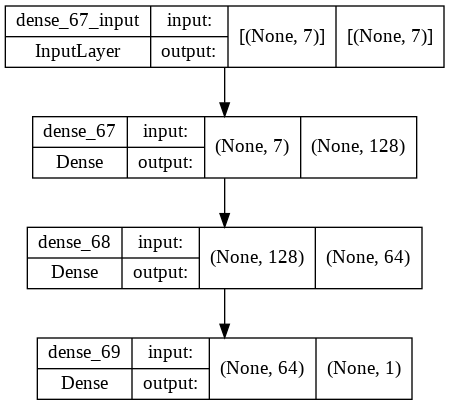

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
model.compile(loss='msle',optimizer='adam',metrics=['RootMeanSquaredError'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=20,verbose=1)

Epoch 1/20
2097/2097 [==============================] - 6s 3ms/step - loss: 14.4340 - root_mean_squared_error: 17943.6504
Epoch 2/20
2097/2097 [==============================] - 6s 3ms/step - loss: 1.3877 - root_mean_squared_error: 13125.8408
Epoch 3/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.2200 - root_mean_squared_error: 7434.5142
Epoch 4/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0847 - root_mean_squared_error: 4944.1890
Epoch 5/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0522 - root_mean_squared_error: 4033.1313
Epoch 6/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0401 - root_mean_squared_error: 3658.2703
Epoch 7/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0369 - root_mean_squared_error: 3516.3970
Epoch 8/20
2097/2097 [==============================] - 6s 3ms/step - loss: 0.0351 - root_mean_squared_error: 3413.2175
Epoch 9/20
2097/2097 [===============

In [ ]:
pred = model.predict(X_test)
import numpy as np
from sklearn.metrics import r2_score
pred = np.squeeze(pred)
y_test = np.squeeze(np.array(y_test))
r2_score(y_test,pred)

0.8064191863812953